<font size="12">Project-3: Data Reconstruction & Analysis</font>

<li><font size="4">Class:DAV 5400 Analytics Programming</font>
<li><font size="4">Director:Stefanie Molin </font>
<li><font size="4">Author:Zhengnan Li </font>
<li><font size="4">Student Id: 800763534 </font>

<font size="6">1. Introduction </font>

In this project. I plan to use the dataset of chip of GPU and CPU to analyse the relationship between chip size, Process Size and frequency,etc. And analyze the attribute in different vender by different type. The dataset is found in heywhale and you can see it from here:

[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

This dataset consists of many kinds of Product in different attributes. My research will be useful for those who are interested in chip development situation. More precisely for the people who want to see summary of the currently chip and their size, performance, transistors and frequency etc. So they can know the relationship between different products and attributes, Which benefits a lot because the customer can choose the product suitable for them and the developer can figure out what they need to improve.What's more they can compare them in different vendors and choose the right product they want.

The purpose of the analysis are as followes:
<ol>
<li>  Observe the product number of different vendors and there 
<li>  Observe the influences of chip process size to Frequency
<li>  Observe the relationship between transister and frequency

<font size="6">2. Data Summary </font>

**We will use the package as follows**
<li>Pandas: Data manipulation and analysis library.
<li>Numpy: Numerical computing library.
<li>Matplotlib: Data visualization library.
<li>Seaborn: Statistical data visualization library.

**View the chip table**

In [3]:
# Making a initialization of class
from src.chip_analysis_package.data_summary import DataProcess

#Put my own path here
my_file_path = 'https://raw.githubusercontent.com/Zhengnan817/Project-3-Data-Reconstruction-and-Analysis/main/src/chip_analysis_package/data/chip_dataset.csv'
cpu_table = DataProcess(my_file_path)
df = cpu_table.view_data()
df.head()

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/07,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,9/6/18,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/13,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/11,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/13,22,95,160.0,1400,2400,Intel


**Check the type**

In [4]:
column_types = df.dtypes
print(column_types)

Product          object
Type             object
Release Date     object
Process Size      int64
TDP               int64
Die Size        float64
Transistors       int64
Freq              int64
Vendor           object
dtype: object


In order to better understand the meaning of the table. Here is the explaination of each column:
<ol>
<li>Product: Description of the products.
<li>Type: Classfication of CPU and GPU.
<li>Release Date:The date of the product publish.
<li>Process Size (nm): The size of the features (the elements that make up the transistors) 
<li>TDP (W): 
Thermal design power is defined as the theoretical maximum amount of heat generated by a CPU or GPU 
<li>Die Size: The die size of a specific chip is the physical dimensions of a bare die
<li>Transistors: tiny electronic switches that can be turned on or off by applying a voltage to their terminals.
<li>Freq: The clock rate of a CPU is normally determined by the frequency of an oscillator crystal.
<li>Vendor:The company to produce the chip

<font size="6"> 3. Exploratory Data Analysis </font>

**In this stage, we will perform exploratory data analysis on the above dataset to answer the above research questions** 

Now we will check if there is any null value present in the dataset

In [5]:
cpu_table.check_data()

Product           0
Type              0
Release Date      0
Process Size      0
TDP               0
Die Size        132
Transistors       0
Freq              0
Vendor            0
dtype: int64

There are some null value in die size which means the dataset doesn't have the specefic data for it. But we can ignore them in EDA.

**3.1 Observe the product number of different vendor**

Observe the distribution of chips in different vendors by Seaborn

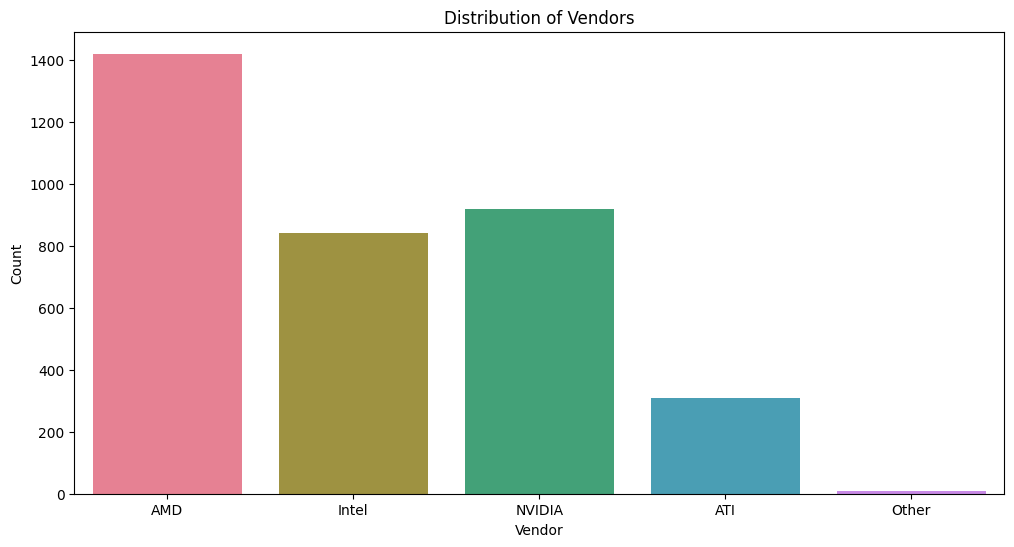

In [6]:

from src.chip_analysis_package.exploratory_data_analysis import EDA  # noqa: E402
EDA_part = EDA(df)
type_distribution_sns = EDA_part.vendor_distribution_sns()

Observe the distribution of chips in different vendors by Matplot

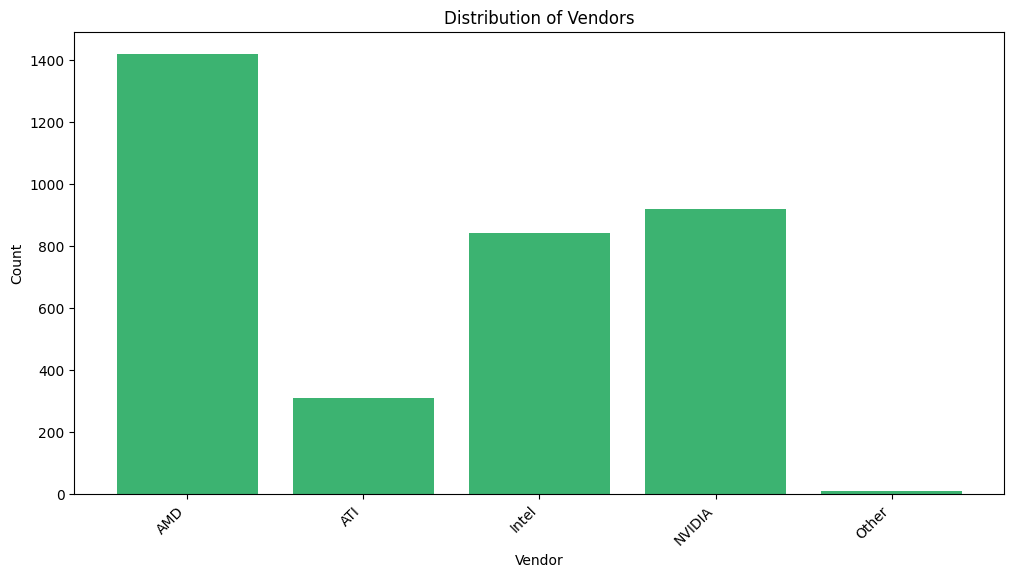

In [7]:
type_distribution_plt = EDA_part.vendor_distribution_plt()

Conclusion:It can be seen from the chart that although there are many manufacturers of chip production, development and production, the three that contribute the most are AMD, Intel and NVIDIA. Their products have at least 800, AMD even exceeds 1,400.

**3.2 Analyze the proportion of CPU and GPU between different manufacturers**

Observe the chips of CPU and GPU in different vendors by Seaborn

<Figure size 1200x600 with 0 Axes>

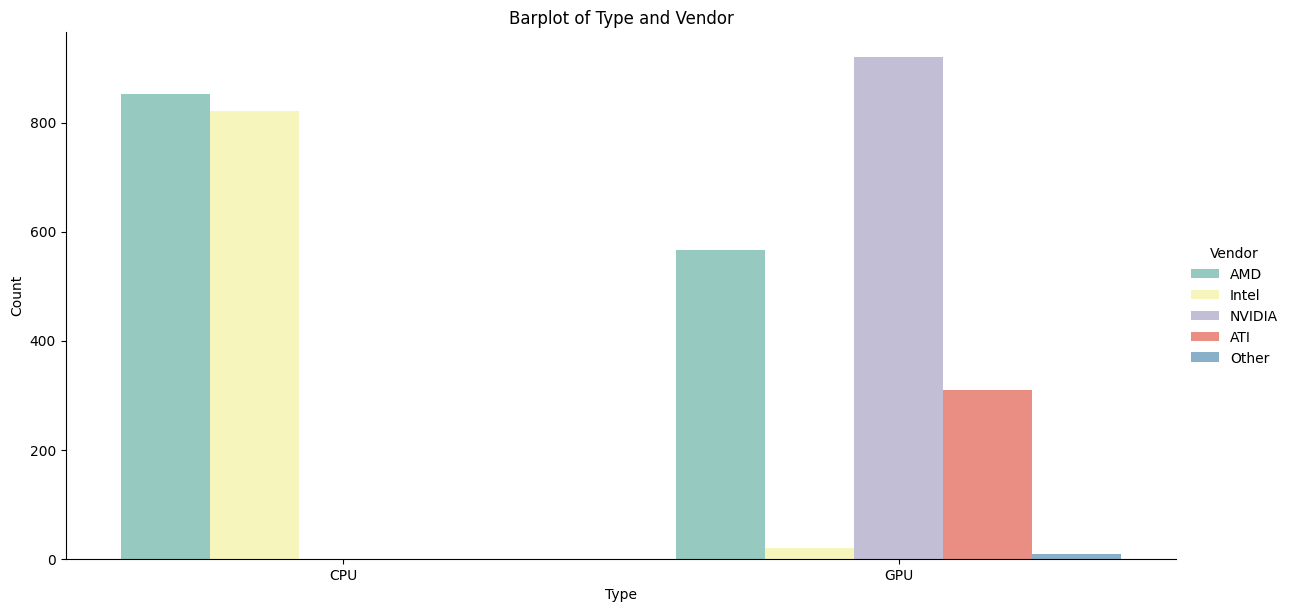

In [8]:
product_vendor_sns = EDA_part.type_vendor_sns()

Observe the chips of CPU and GPU in different vendors by Matplot

<Figure size 1200x600 with 0 Axes>

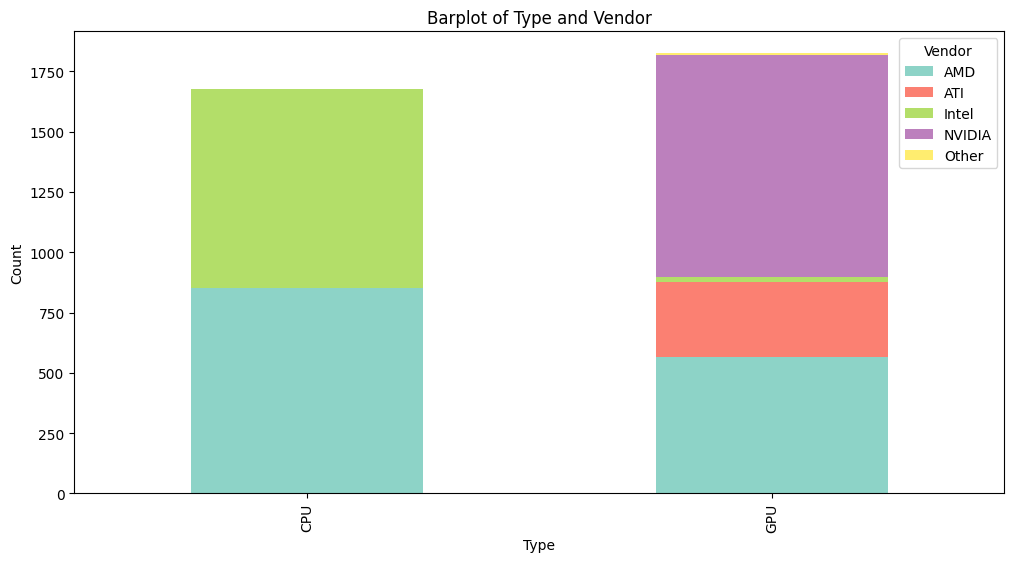

In [9]:
product_vendor_plt = EDA_part.type_vendor_plt()

Conclusion:From the above chart, we can see that the main manufacturers of CPU chips are AMD and Intel, and their chip development numbers are basically the same. The main manufacturers of GPU are NVIDA and AMD, but NVIDA's number of chip developments far exceeds that of AMD. From this we can draw a conclusion: AMD is a comprehensive chip development company. It develops both GPU and CPU. Intel is more proficient in CPU development, and NVDIA is more focused on GPU development.

**3.2 Analyze the process size of CPU and GPU between different manufacturers**

Analyzing the process size of chip including CPU and GPU in different vendors by Seaborn.

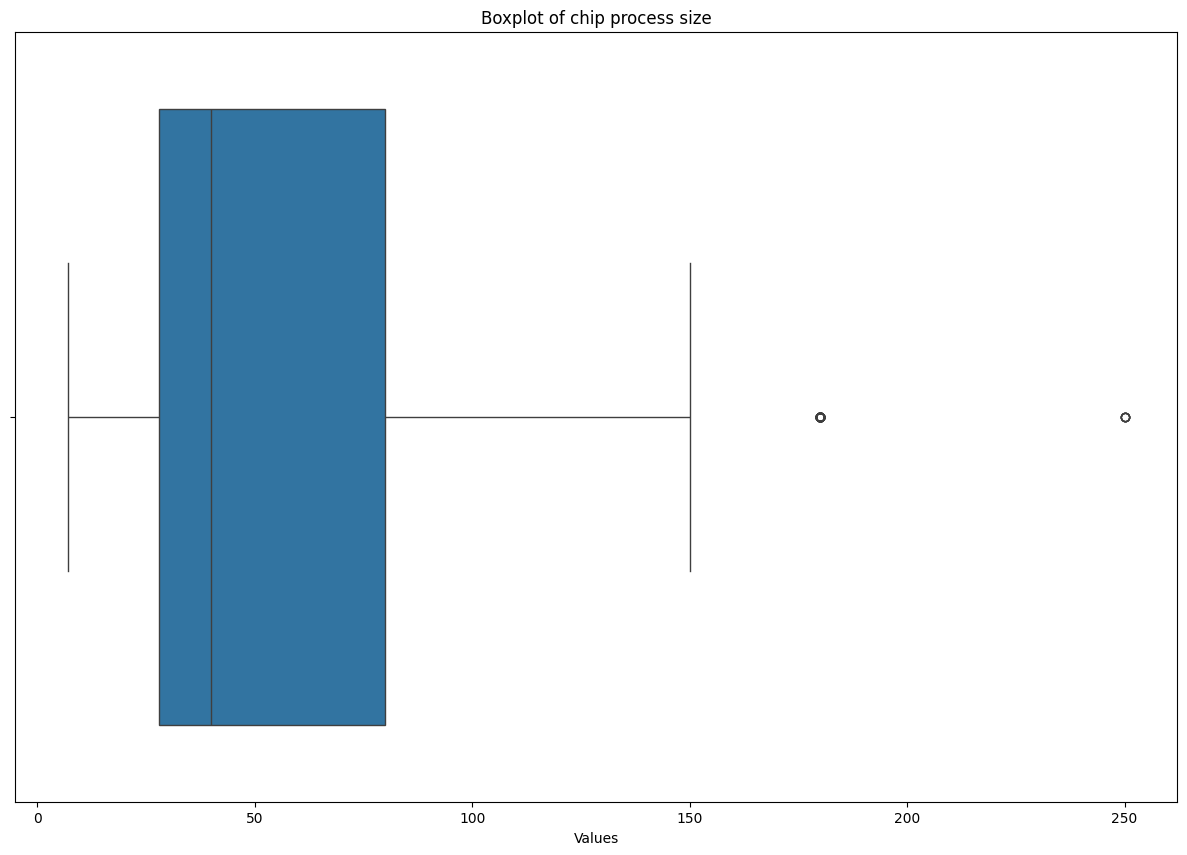

In [10]:
process_size_sns = EDA_part.process_size_sns()

Analyzing the process size of chip including CPU and GPU in different vendors by Matplot.

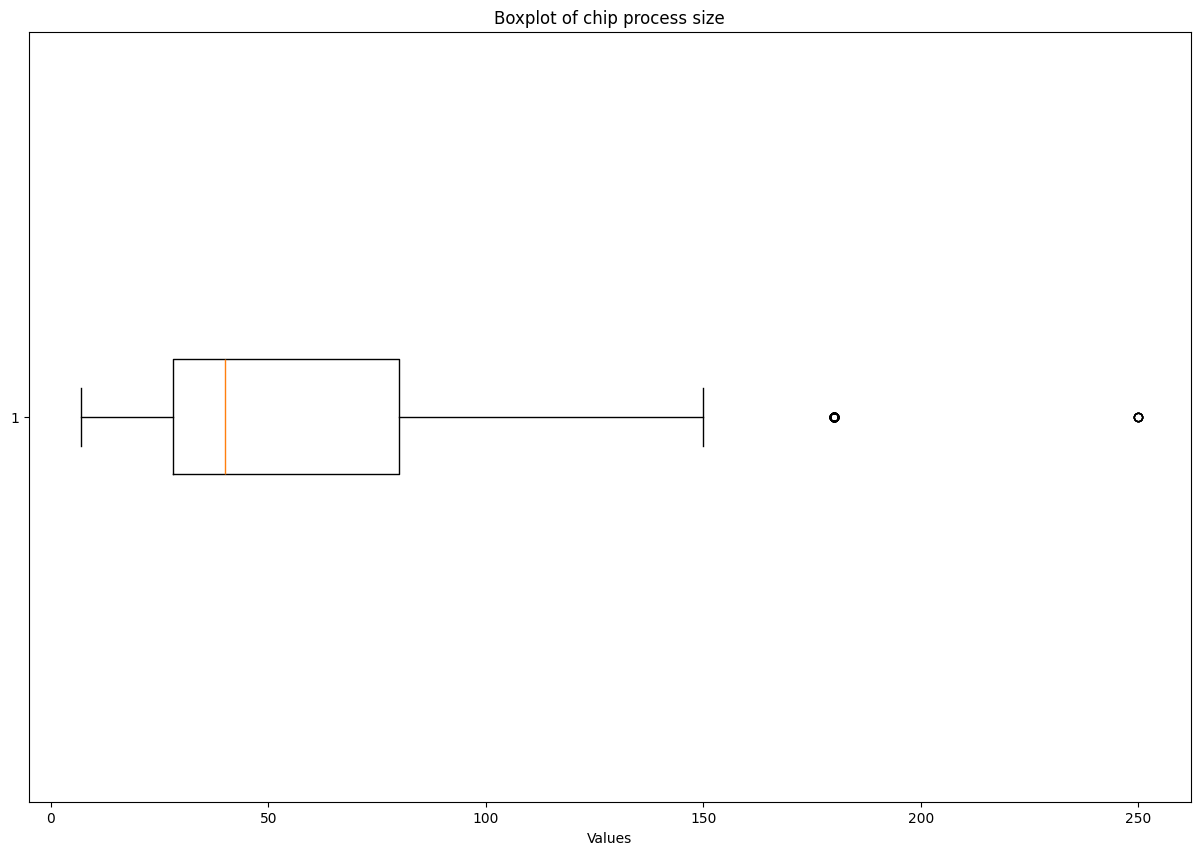

In [11]:
process_size_plt = EDA_part.process_size_plt()

After overvies the whole market situation. Let's observe the process size by different vendor

Observe process size by different vendor using Seaborn

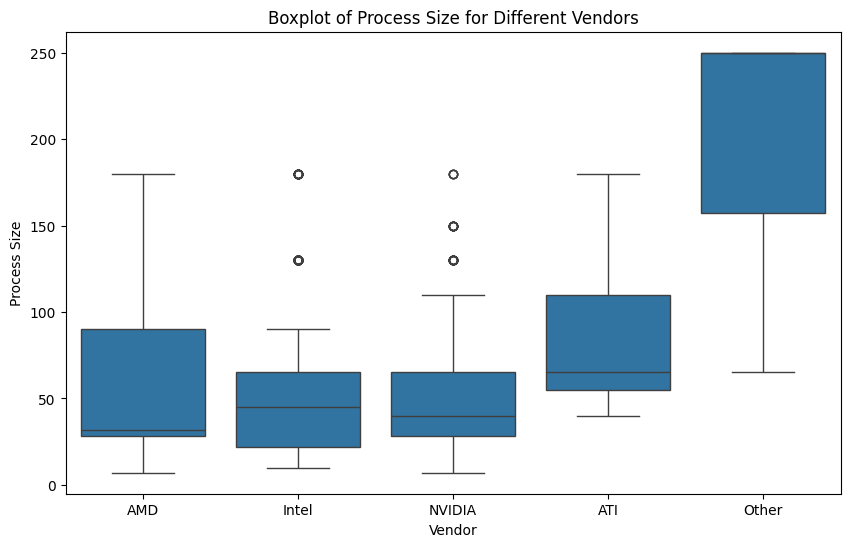

In [12]:
process_size_vendor = EDA_part.process_size_vendor_sns()

Observe process size by different vendor using Matplot.

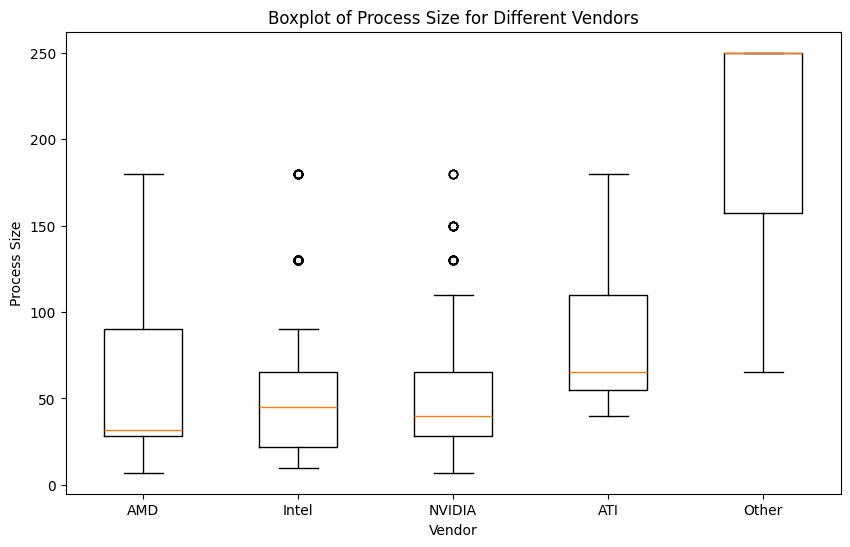

In [13]:
process_size_vendor = EDA_part.process_size_vendor_plt()

Conclusion: Process size governs the physical size of the components that make up a chip. Smaller process nodes can translate into reduced costs and lower power consumption. There are tradeoffs in difficulty and possibly power or cost, though (as they say, there's no such thing as a free lunch).This data set contains all types of chips from various manufacturers, so you can see from the chart that the commonly used chip process sizes on the market are mainly concentrated in sizes less than 50 nanometers. Although the smaller the process technology, the better the performance and the higher the energy consumption. Small, but cost issues also need to be considered. Currently, communication products use more 5nm processes. Samsung even developed the first 2nm chip in 2022.

**3.3 Analysis and overview of TDP performance of chips from various vendors**

Analyzing the TDP performance of chips by Seaborn.

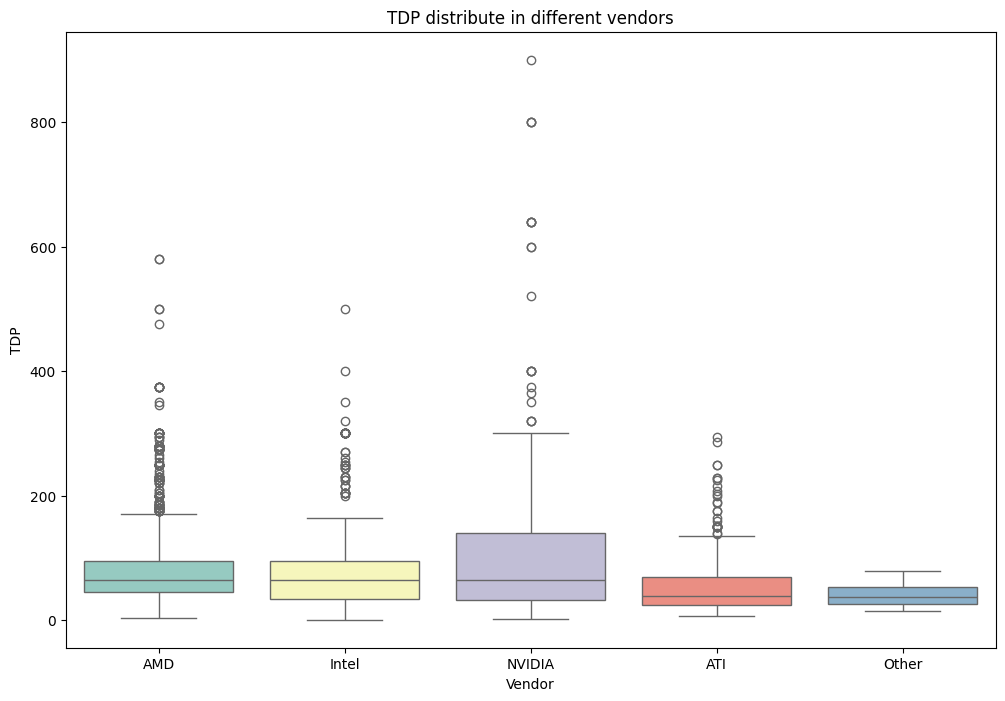

In [14]:
release_date_sns = EDA_part.TDP_distribution_sns()

Analyzing the TDP performance of chips by Matplot.

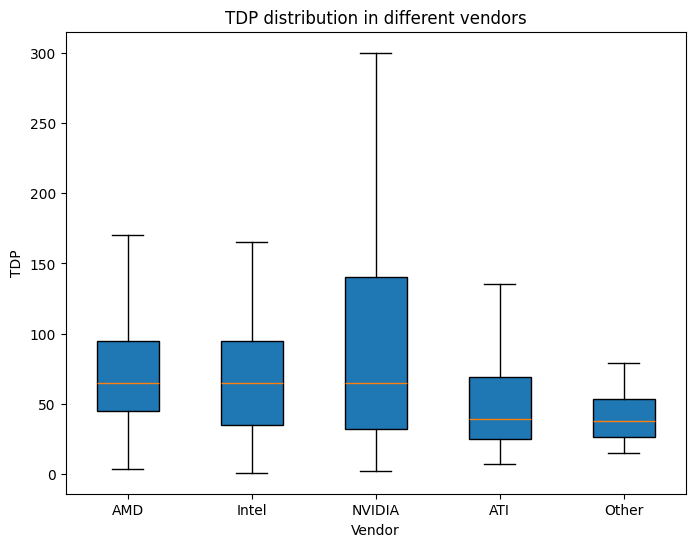

In [15]:
release_date_plt = EDA_part.TDP_distribution_plt()

The thermal design power (TDP), sometimes called thermal design point, is the maximum amount of heat generated by a computer chip or component (often a CPU, GPU or system on a chip) that the cooling system in a computer is designed to dissipate under any workload.We can see from the chart that the TDP of AMD, Intel and NVIDA, the top three companies in chip development, are basically the same, which also shows that they have the right to formulate industry standards in the industry. Although their TDP is higher than ATI and other small companies, the above process size analysis results show that the processing performance of these three companies is better, which also explains that these three companies are higher than other companies.

<font size="6"> 4. Inference </font>

In [16]:
from src.chip_analysis_package.inferences import Inferences  # noqa: E402
inferences_analysis = Inferences(df)

**4.1 Analyze the proportion of CPU and GPU between different Vendor**

Analyze the proportion of CPU and GPU between different Vendor using Seaborn.

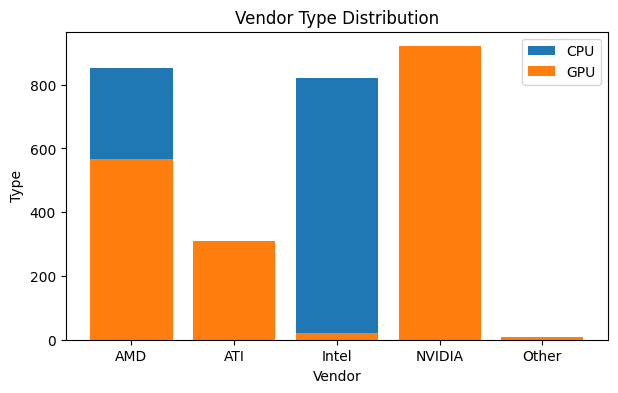

In [17]:
inferences_analysis.vendor_type_plt()

Analyze the proportion of CPU and GPU between different Vendor using Matplot.

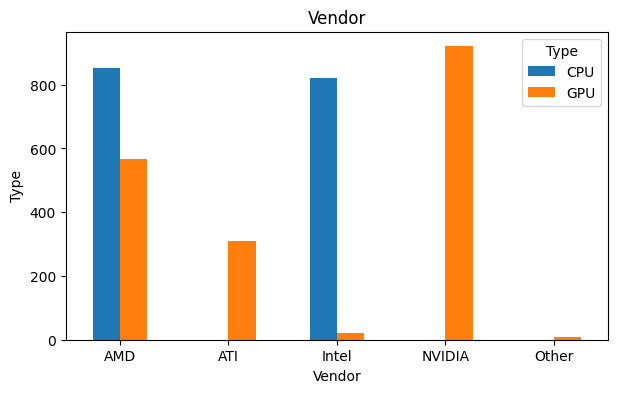

In [18]:
inferences_analysis.vendor_type_sns()

In this section, we change the form and continue to look at the proportions of CPUs and GPUs corresponding to different vendors, which further illustrates the comprehensive strength of AMD and the professionalism of Intel and NVDIA in the fields of CPU and GPU.

**4.2 Analyze the attribute of CPU and GPU between different Vendor**

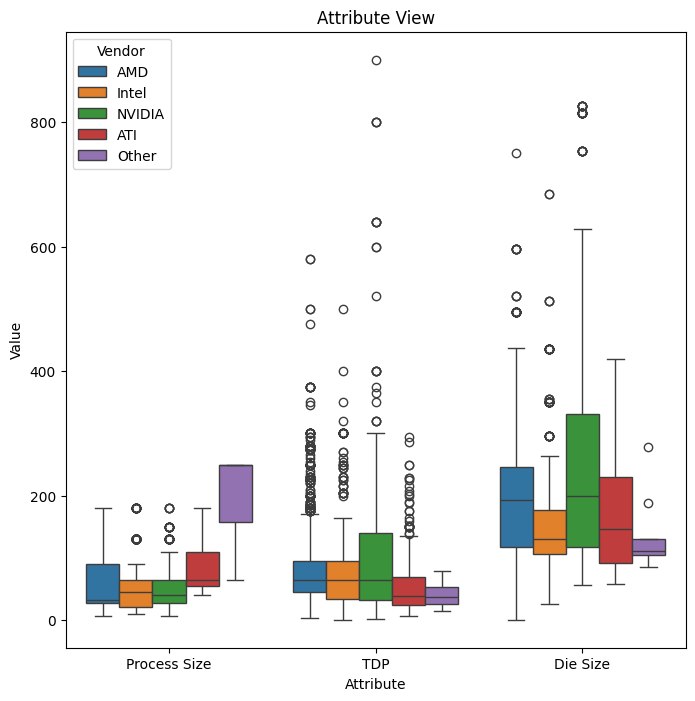

In [19]:
inferences_analysis.chip_attribute()

This part is to first have a rough understanding of the chip performance of each manufacturer to provide us with direction for further analysis.

**4.3 Analyze the averange  frequency of CPU and GPU between different Vendor**

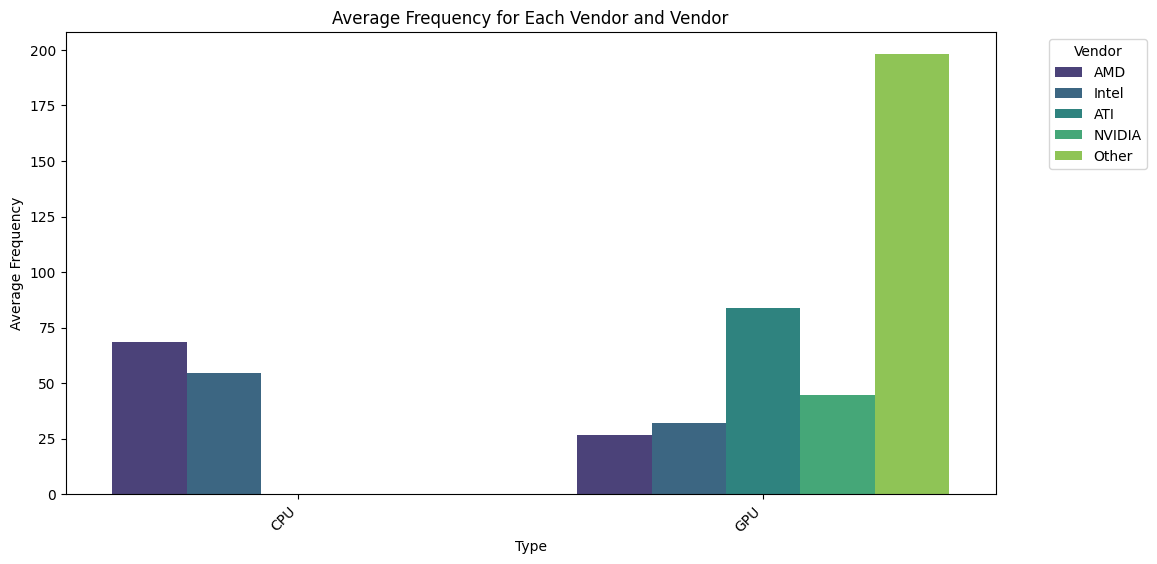

In [20]:
inferences_analysis.ave_freq_type_ven()

Conclusion: The frequency of a microchip refers to the frequency of the radio wave given off by the scanner that activates and reads the chip.There is no one specific frequency band that is the most important band to the Department. However, the preponderance of the frequencies used by the DON is between 30 Hz to 3 GHz. The Extremely Low Frequency (ELF) band and Very Low Frequency (VLF) band support our tactical submarine forces and other DON capabilities, while higher frequencies in the Very High Frequency (VHF), Ultra High Frequency (UHF) and Super High Frequency (SHF) bands support communications and a myriad of other DON capabilities such as unmanned aerial vehicles. Frequencies in the EHF band support critical DON satellite communications that provide immediate, worldwide communications and intelligence capabilities.

So,From the above figure, we can see that there is not much difference in the frequencies of AMD and Intel, the two manufacturers of CPU chips, and the main frequency bands are concentrated between 50 and 70, indicating that the CPUs of the two manufacturers are mainly used for communication. There are obvious differences in the frequency bands of multiple manufacturers in GPU, especially ATI, which may be more used in the military field。

**4.4 Analyze the averange Die size of CPU and GPU between different Vendor**

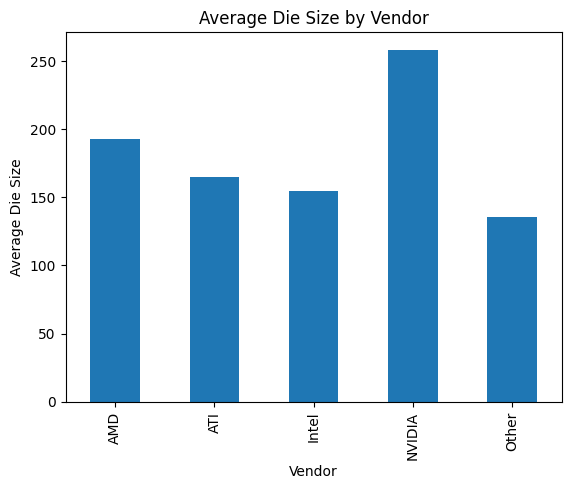

In [21]:
inferences_analysis.freq_and_TDP()

Conclusion: A smaller die size also allows you to pack more transistors in a given surface area. This allows manufacturers to get more chips per wafer, reducing the manufacturing cost per chip. This improves profitability for manufacturers.Therefore, as can be seen from the above table, Intel's Die Size is the smallest among all manufacturers, so its performance is also superior. Although the results of Others are smaller, on the one hand they are not very representative, and on the other hand they have obvious shortcomings in terms of chip development quantity and performance, so they are not considered.

<font size="6"> 5. Conclusion </font>

The purpose of this research was to inform about the different types of chip by different vendors and attributes.From this research it can be stated that.To sum up, we can see that different manufacturers have different advantages and disadvantages in terms of CPU and GPU. After considering the number of chip development, die size, process size, TDP and frequency, if the computing performance requirements are higher, , both Intel and AMD can be considered, and AMD's GPU performance is also considered the industry leader. If the image processing requirements are relatively high, you can choose a device configured with NVDIA's GPU to meet high-performance requirements.Generally speaking, the smaller the size of the chip processing technology, the smaller the number of transistors, the smaller the chip die, and the faster the chip frequency. We can summarize our future research directions for chips.

<font size="6"> 6. References </font>

[Pandas lib references](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

[Seaborn lib references](https://seaborn.pydata.org/index.html)

[Chip technology](https://www.asml.com/en/technology/all-about-microchips/microchip-basics)

[Chip's process size](https://www.10stripe.com/articles/what-does-process-size-mean.php)

[Chip's TDP](https://en.wikipedia.org/wiki/Thermal_design_power)

[Chip's Frequency](https://www.doncio.navy.mil/CHIPS/ArticleDetails.aspx?ID=3047)

[Chip's Die Size](https://www.quora.com/What-is-this-die-size-in-CPUs-What-difference-does-it-make)